# 1. Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.random.seed(20)

In [43]:
# Load the data
data_path = '../data/Wine_Quality_Data.csv'
df = pd.read_csv(data_path)
# 상위 5개 데이터 출력
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

In [44]:
# X = features
X = df.drop(['quality','color'], axis=1)

# y = target (예측할 것)
y = df['quality']

# 자동 분할 (학습 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
lr = LogisticRegression()

# 모든 특성의 평균을 0, 표준편차를 1로 변환
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

X_predict = lr.predict(X_test_scaled)



In [46]:
print(f"Logistic Regression 정확도: {accuracy_score(y_test, X_predict)}")

Logistic Regression 정확도: 0.5361538461538462


### 혼동 행렬 (Confusion Matrix) 시각화

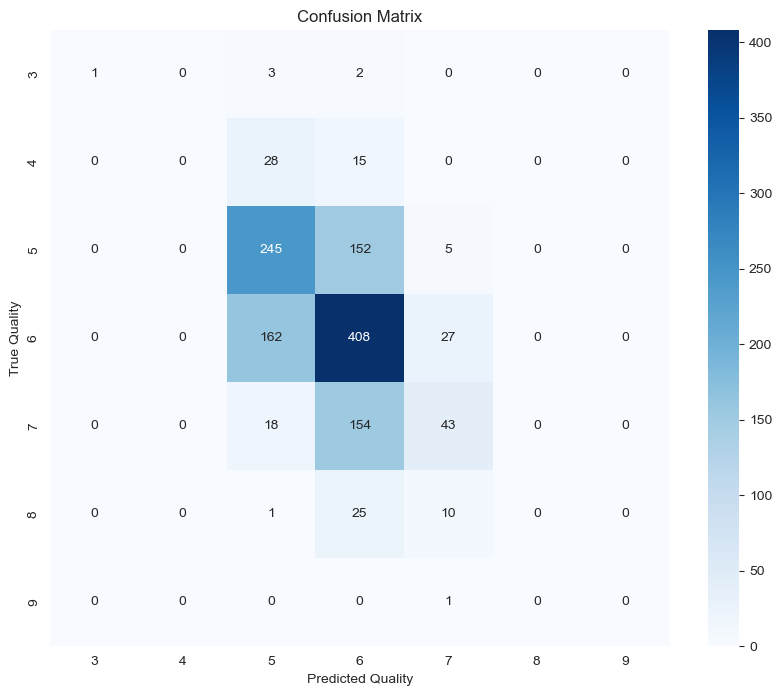

In [47]:
# 혼동 행렬 생성
cm = confusion_matrix(y_test, X_predict)

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

### 특성 중요도 (Feature Importance)

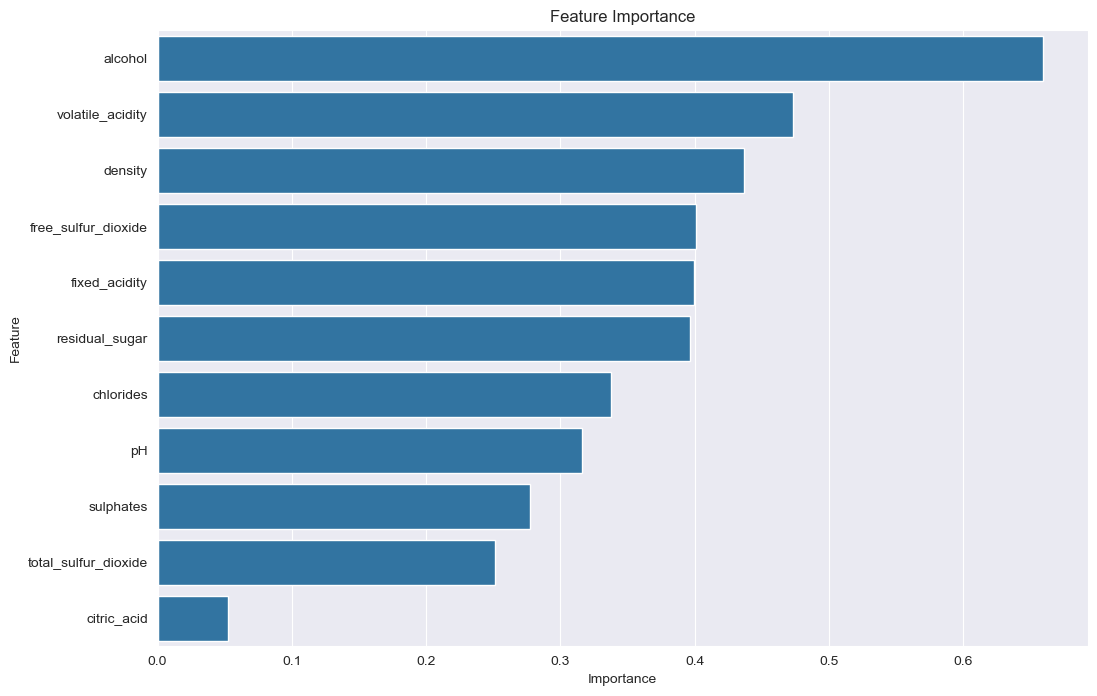

In [48]:
# 학습된 모델(lr)에서 계수(coefficients)를 가져옵니다.
# 계수의 절댓값이 클수록 예측에 더 큰 영향을 미친 특성입니다.
feature_importance = pd.DataFrame({
    'feature': X.columns,
    # 다중 클래스이므로, 모든 클래스에 대한 계수의 평균 절댓값을 사용합니다.
    'importance': np.mean(np.abs(lr.coef_), axis=0)
})

# 중요도 순으로 정렬합니다.
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 막대그래프로 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. K-Nearest Neighbors

In [49]:

# k-NN 모델 생성 (일반적으로 홀수인 5를 기본값으로 시작합니다)
knn = KNeighborsClassifier(n_neighbors=5)

# 스케일링된 데이터로 모델 학습
# k-NN은 거리 기반 알고리즘이므로 스케일링된 데이터를 사용하는 것이 중요합니다.
knn.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_knn = knn.predict(X_test_scaled)

In [56]:
# 정확도 평가 및 출력
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"k-NN 모델 정확도 (k=5): {knn_accuracy}")

k-NN 모델 정확도 (k=5): 0.5453846153846154


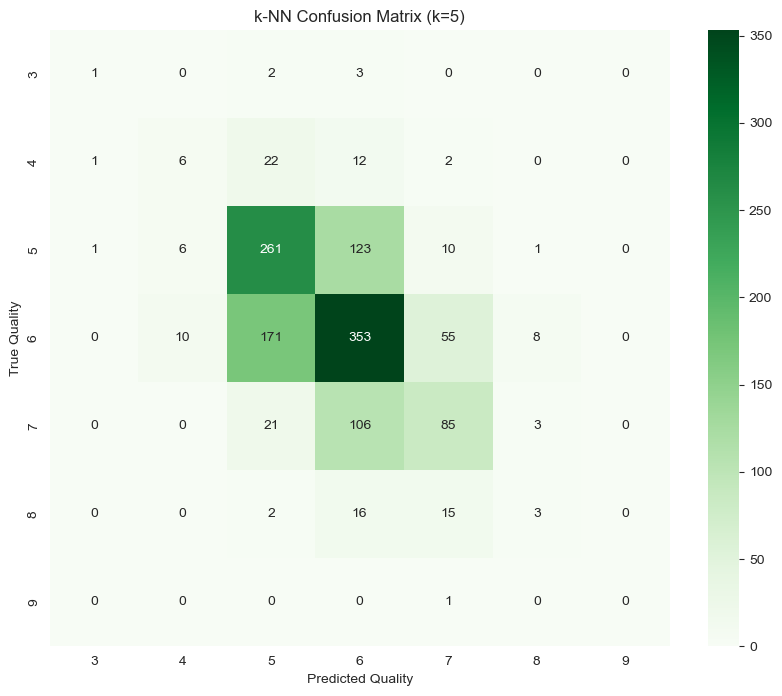

In [51]:

# 혼동 행렬 생성
cm_knn = confusion_matrix(y_test, y_pred_knn)

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.title('k-NN Confusion Matrix (k=5)')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

# (심화) 최적의 k 값 찾기

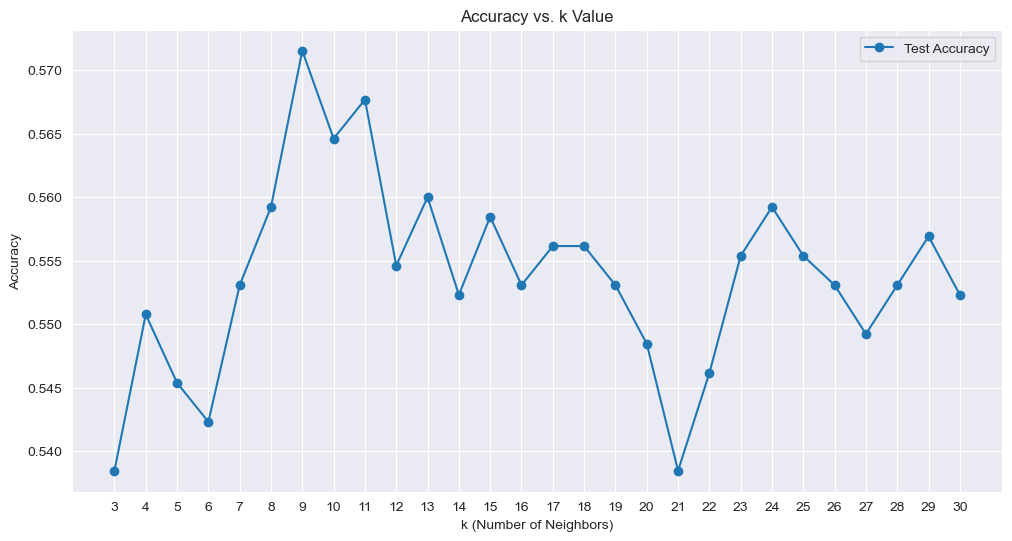


가장 높은 정확도를 보인 k: 9 (정확도: 0.5715)


In [52]:
# 테스트할 k 값의 범위 설정
k_range = range(3, 31)
accuracies = []

# 각 k 값에 대해 모델을 학습하고 정확도를 기록
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

# k 값에 따른 정확도 변화를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies, 'o-', label='Test Accuracy')
plt.title('Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

# 가장 높은 정확도를 보인 k 값 찾기
best_k = k_range[np.argmax(accuracies)]
print(f"\n가장 높은 정확도를 보인 k: {best_k} (정확도: {max(accuracies):.4f})")

# 3. Naive Bayes

In [53]:

# 가우시안 나이브 베이즈 모델 생성
gnb = GaussianNB()

# 스케일링된 데이터로 모델 학습
gnb.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_gnb = gnb.predict(X_test_scaled)

In [57]:

# 정확도 평가 및 출력
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"가우시안 나이브 베이즈 모델 정확도: {gnb_accuracy}")


가우시안 나이브 베이즈 모델 정확도: 0.4653846153846154


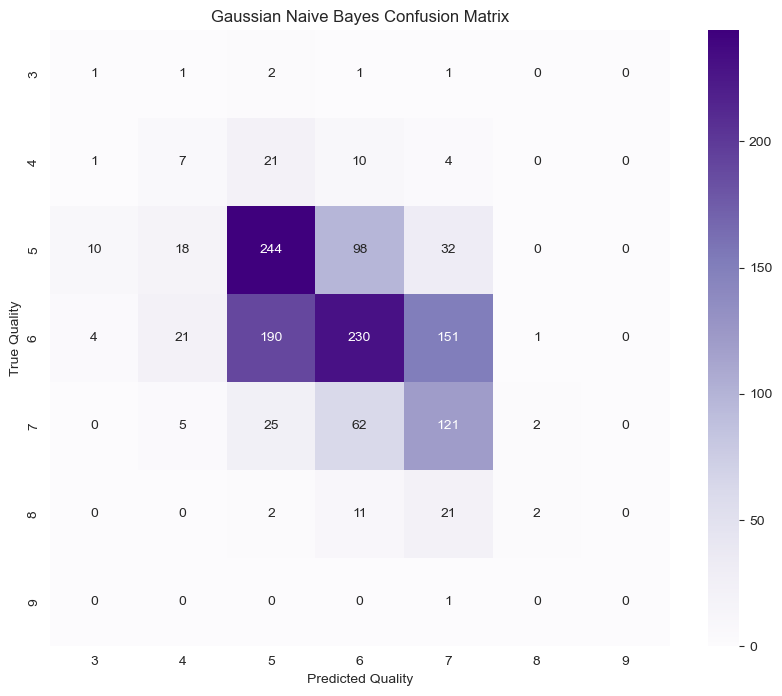

In [55]:

# 혼동 행렬 생성
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()